In [1]:

import truststore
truststore.inject_into_ssl()
from bicimad.bicimad import BiciMad
bici = BiciMad(7, 21)
print(bici.data.columns.tolist())
print(len(bici.data.columns))


['idBike', 'fleet', 'trip_minutes', 'geolocation_unlock', 'address_unlock', 'locktype', 'unlocktype', 'geolocation_lock', 'address_lock', 'lock_date', 'station_unlock', 'unlock_station_name', 'station_lock', 'lock_station_name']
14


In [2]:
df=bici.data
df.head()

,idBike,fleet,trip_minutes,geolocation_unlock,address_unlock,locktype,unlocktype,geolocation_lock,address_lock,lock_date,station_unlock,unlock_station_name,station_lock,lock_station_name
unlock_date,,,,,,,,,,,,,,
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2021-07-01 00:00:03,284.0,1.0,5.05,"{'type': 'Point', 'coordinates': [-3.6991147, ...",NaN,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.6933463, ...",NaN,2021-07-01 00:05:06,45.0,Antón Martín,54.0,Museo Reina Sofía
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2021-07-01 00:00:09,7074.0,1.0,7.90,"{'type': 'Point', 'coordinates': [-3.6954983, ...",NaN,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.6766111, ...",NaN,2021-07-01 00:08:03,20.0,Prim,189.0,Retiro-Ibiza
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [2]:
bici.clean()
dfclean=bici.data
dfclean.head()

,idBike,fleet,trip_minutes,geolocation_unlock,address_unlock,locktype,unlocktype,geolocation_lock,address_lock,lock_date,station_unlock,unlock_station_name,station_lock,lock_station_name
fecha,,,,,,,,,,,,,,
2021-07-01,284.0,1.0,5.05,"{'type': 'Point', 'coordinates': [-3.6991147, ...",NaN,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.6933463, ...",NaN,2021-07-01 00:05:06,45.0,Antón Martín,54.0,Museo Reina Sofía
2021-07-01,7074.0,1.0,7.90,"{'type': 'Point', 'coordinates': [-3.6954983, ...",NaN,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.6766111, ...",NaN,2021-07-01 00:08:03,20.0,Prim,189.0,Retiro-Ibiza
2021-07-01,6090.0,1.0,10.12,"{'type': 'Point', 'coordinates': [-3.697895, 4...",NaN,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.7040344, ...",NaN,2021-07-01 00:10:21,62.0,Augusto Figueroa,156.0,Bravo Murillo 44
2021-07-01,6474.0,1.0,4.53,"{'type': 'Point', 'coordinates': [-3.7036825, ...",NaN,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.7022591, ...",NaN,2021-07-01 00:05:00,38.0,Jacinto Benavente,52.0,Embajadores 2
2021-07-01,445.0,1.0,8.13,"{'type': 'Point', 'coordinates': [-3.6726019, ...",NaN,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.680008, 4...",NaN,2021-07-01 00:08:37,89.0,Valderribas,90.0,Puerta de Madrid


In [14]:
bici.resume()


year                                                                     21
month                                                                     7
total_uses                                                           416464
total_time                                                    194434.526167
most_popular_station      {'28046,ES,Madrid,Madrid,CALLE DE MAURICIO LEG...
uses_from_most_popular                                                  305
dtype: object

## Consultas

Las siguientes consultas se realizarán con el dataframe `usos` creado en los apartados anteriores.

### C1

¿Cuántas bicicletas han sido desbloqueadas de una estación y no se bloquean en ninguna?

In [15]:
bicis = bici.data.query("station_unlock.notna() and station_lock.isna()")["idBike"].nunique()

# Mostrar cuántas
print("Número de bicicletas desbloqueadas desde estación pero sin estación de bloqueo:",(bicis))

Número de bicicletas desbloqueadas desde estación pero sin estación de bloqueo: 0


### C2

Seleccionar solo las bicicletas del tipo de flota '1' . El nuevo dataframe se ha de llamar `regular_fleet`.

In [16]:
regular_fleet = bici.data[bici.data["fleet"] == "1.0"]

regular_fleet.head()

,idBike,fleet,trip_minutes,geolocation_unlock,address_unlock,locktype,unlocktype,geolocation_lock,address_lock,lock_date,station_unlock,unlock_station_name,station_lock,lock_station_name
fecha,,,,,,,,,,,,,,
2021-07-01,284.0,1.0,5.05,"{'type': 'Point', 'coordinates': [-3.6991147, ...",NaN,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.6933463, ...",NaN,2021-07-01 00:05:06,45.0,Antón Martín,54.0,Museo Reina Sofía
2021-07-01,7074.0,1.0,7.90,"{'type': 'Point', 'coordinates': [-3.6954983, ...",NaN,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.6766111, ...",NaN,2021-07-01 00:08:03,20.0,Prim,189.0,Retiro-Ibiza
2021-07-01,6090.0,1.0,10.12,"{'type': 'Point', 'coordinates': [-3.697895, 4...",NaN,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.7040344, ...",NaN,2021-07-01 00:10:21,62.0,Augusto Figueroa,156.0,Bravo Murillo 44
2021-07-01,6474.0,1.0,4.53,"{'type': 'Point', 'coordinates': [-3.7036825, ...",NaN,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.7022591, ...",NaN,2021-07-01 00:05:00,38.0,Jacinto Benavente,52.0,Embajadores 2
2021-07-01,445.0,1.0,8.13,"{'type': 'Point', 'coordinates': [-3.6726019, ...",NaN,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.680008, 4...",NaN,2021-07-01 00:08:37,89.0,Valderribas,90.0,Puerta de Madrid


### C3

Crea una función llamada `day_time` para calcular las horas totales de uso de bicicletas por día del mes.
La función recibe un dataframe y devuelve una Serie donde el índice es la fecha y el valor es el número de horas.

Prueba la función anterior con el dataframe  `usos`.

__Opcional:__ Dibuja un diagrama de barras con el resultado de la función `day_time` sobre el dataframe `usos`. Utiliza el módulo `matplotlib.pyplot`.

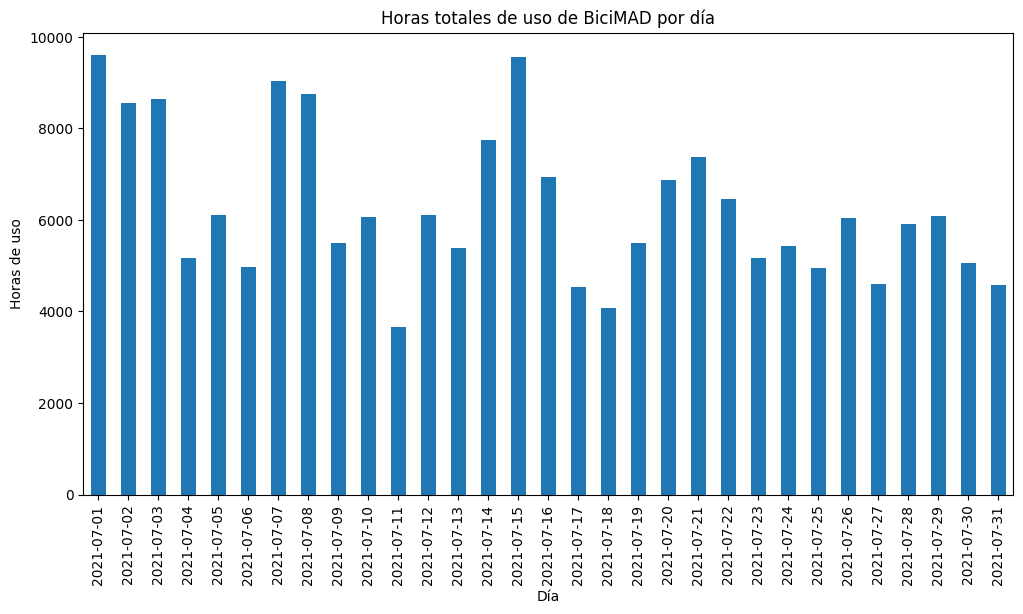

fecha
2021-07-01    9611.060500
2021-07-02    8558.774833
2021-07-03    8651.580833
2021-07-04    5177.478667
2021-07-05    6100.824333
2021-07-06    4971.245500
2021-07-07    9026.805833
2021-07-08    8759.214333
2021-07-09    5490.142000
2021-07-10    6072.033500
2021-07-11    3670.635667
2021-07-12    6106.807667
2021-07-13    5376.010833
2021-07-14    7753.505833
2021-07-15    9558.013333
2021-07-16    6947.312500
2021-07-17    4536.324167
2021-07-18    4081.726667
2021-07-19    5505.402667
2021-07-20    6871.263500
2021-07-21    7363.628167
2021-07-22    6463.603000
2021-07-23    5157.873000
2021-07-24    5425.784000
2021-07-25    4949.130833
2021-07-26    6049.222333
2021-07-27    4590.424333
2021-07-28    5904.216667
2021-07-29    6085.144333
2021-07-30    5050.704000
2021-07-31    4568.632333
Name: trip_minutes, dtype: float64

In [3]:
bici.day_time(plot=True)

### C4

Crea una función llamada `weekday_time` para calcular las horas totales de uso de bicicletas por día de la semana. La función recibe un dataframe y devuelve una Serie donde el índice es el día de la semana (L, M, X, J, V, S, D) y el valor es el número de horas.

Prueba la función anterior con el dataframe usos.

In [19]:

dias = ['L', 'M', 'X', 'J', 'V', 'S', 'D']

df_valido = bici.data[~bici.data.index.isna()]

horas_por_dia_semana = (
    df_valido['trip_minutes']
    .groupby(df_valido.index.map(lambda d: dias[d.weekday()]))
    .sum() / 60
)

horas_por_dia_semana = horas_por_dia_semana.reindex(dias)

horas_por_dia_semana.head()

fecha
L    23762.257000
M    21808.944167
X    30048.156500
J    40477.035500
V    31204.806333
Name: trip_minutes, dtype: float64

### C5

Crea una función llamada `total_usage_day` para calcular el número total de usos de bicicletas por día del mes. La función recibe un dataframe y devuelve una Serie donde el índice es la fecha y el valor es el número de usos.

Prueba la función anterior con el dataframe usos.

In [20]:

usos_por_dia = bici.data.groupby(bici.data.index).size()
usos_por_dia.head()

fecha
2021-07-01    18981
2021-07-02    16834
2021-07-03    13305
2021-07-04    11957
2021-07-05    15911
dtype: int64

### C6

Calcular el total de usos por fecha y estación de desbloqueo. Como la fecha está en el índice y la estación de desbloqueo es una columna, lo mejor es agrupar por la columna `station_unlock` y  un objeto `Grouper` de frecuencia diaria (1D).

A continuación, se muestra un ejemplo del funcionamiento de la función Grouper de pandas:
```
>>> df
             ID  Price
2000-01-02   0     10
2000-01-02   1     20
2000-01-09   2     30
2000-01-16   3     40

# Grouper con frecuencia semanal (1W)
>>> df.groupby(pd.Grouper(freq="1W")).mean()
               ID  Price

2000-01-02    0.5   15.0
2000-01-09    2.0   30.0
2000-01-16    3.0   40.0
```

In [22]:
import pandas as pd

df_agrupado = (
    bici.data
    .groupby([pd.Grouper(freq='1D'), 'station_unlock'])  # agrupamos por fecha + estación desbloqueo
    .size()
    .reset_index(name='usos')  # el conteo se renombra a columna "usos"
)

df_agrupado.head(20)

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

### C7

Se quiere averiguar la dirección de las estaciones de desbloqueo que a lo largo del mes han tenido un mayor número de viajes. Crear una función llamada `most_popular_stations` que calcule dicho dato. El argumento de la función es un dataframe y devuelve un conjunto con la dirección de las estaciones.


In [34]:
bici.most_popular_stations()

AttributeError: 'BiciMad' object has no attribute 'most_popular_stations'

### C8

Se quiere averiguar el  número de usos de las estaciones de desbloqueo que a lo largo del mes ha tenido un mayor número de viajes. Crear una función llamada `usage_from_most_popular_station` que calcule dicho dato. El argumento de la función es un dataframe y devuelve un entero.